In [39]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('adults_numeric.del', header = None)

### Dateset Used
We will be using the "adults_numeric.del" as it is a numeric based dataset. We chose this dataset as it was easier to perform anonymization based on numerical values. 

#### Column Names
We decided to term the columns as 'age', 'education', 'work', 'marital', 'occupation', 'race', 'sex', 'native' & 'Nan' (temporary column that will be deleted)
Age and Education are integer based values.
Work, Marital, Occupation, Race, Sex and Native are categorical numerical values. 

In [41]:
df.columns =['age', 'education', 'work', 'marital', 'occupation', 'race', 'sex', 'native','Nan'] 

In [42]:
#Deleting the 'Nan' column. 
df = df[df.columns[:-1]]

In [43]:
#Changing the required columns to categorical. 
categorical = set((
    'work',
    'marital',
    'occupation',
    'race',
    'sex',
    'native'
))

In [44]:
for name in categorical:
    df[name] = df[name].astype('category')

In [45]:
#temp stores the pre-operation dataset. Will be used for comparison of queries. 
temp = df.copy()
temp

,age,education,work,marital,occupation,race,sex,native
0,39,4,13,6,10,0,0,0
1,50,1,13,0,0,0,0,0
2,38,5,9,3,6,0,0,0
3,53,5,7,0,6,1,0,0
4,28,5,13,0,1,1,1,2
...,...,...,...,...,...,...,...,...
30157,27,5,12,0,2,0,1,0
30158,40,5,9,0,11,0,0,0
30159,58,5,9,2,10,0,1,0
30160,22,5,9,6,10,0,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         30162 non-null  int64   
 1   education   30162 non-null  int64   
 2   work        30162 non-null  category
 3   marital     30162 non-null  category
 4   occupation  30162 non-null  category
 5   race        30162 non-null  category
 6   sex         30162 non-null  category
 7   native      30162 non-null  category
dtypes: category(6), int64(2)
memory usage: 651.8 KB


#### Data Analysis
As age and education are the only integer value in the dataset, we will try to understand its distribution better. 

In [47]:
df.describe()

,age,education
count,30162.000000,30162.000000
mean,38.437902,4.217757
std,13.134665,1.484039
min,17.000000,0.000000
25%,28.000000,4.000000
50%,37.000000,5.000000
75%,47.000000,5.000000
max,90.000000,6.000000


To comprehend the outliers of each of these parameters, we will be visualizing it through a box plot. <br>
From the first boxplot, for age, it is shown that there are many outliers in the range from 75 years to 90 years. <br>
From the second boxplot, for age, it shows that there are outliers in the lower catergory of 0 to 2 years. <br>
We will be considering this during our anonymization process. 

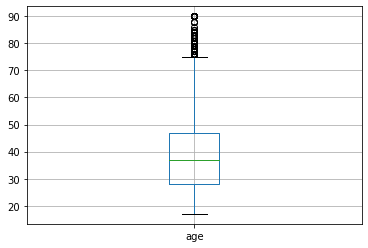

In [48]:
df.boxplot(column=['age'])

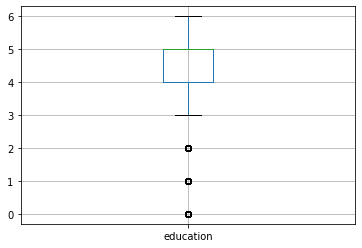

In [49]:
df.boxplot(column=['education'])

We also visualized or mentioned the numerical distribution of each column to know how each of them are populated in our dataset. 

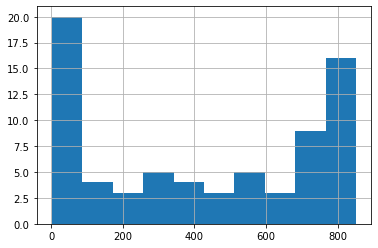

In [50]:
df['age'].value_counts().hist();

In [51]:
df['age'].value_counts()

36    852
31    851
33    837
34    836
35    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64

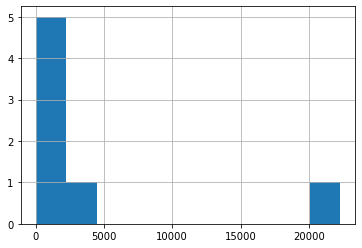

In [52]:
b = df['education'].value_counts()
df['education'].value_counts().hist();

In [53]:
b

5    22286
1     2499
3     2067
4     1279
0     1074
2      943
6       14
Name: education, dtype: int64

In [54]:
work_distribution = df['work'].value_counts();
work_distribution

9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: work, dtype: int64

In [55]:
marital_distribution = df['marital'].value_counts()
marital_distribution

0    14065
6     9726
3     4214
5      939
2      827
4      370
1       21
Name: marital, dtype: int64

In [56]:
occupation_distribution = df['occupation'].value_counts()
occupation_distribution

1     4038
9     4030
0     3992
10    3721
3     3584
7     3212
11    1966
5     1572
6     1350
12     989
2      912
4      644
8      143
13       9
Name: occupation, dtype: int64

In [57]:
race_distribution = df['race'].value_counts()
race_distribution

0    25933
1     2817
2      895
3      286
4      231
Name: race, dtype: int64

In [58]:
sex_distribution = df['sex'].value_counts();
sex_distribution

0    20380
1     9782
Name: sex, dtype: int64

In [59]:
native_distribution = df['native'].value_counts();
native_distribution

0     27504
38      610
20      188
26      128
10      109
1       107
4       100
15      100
2        92
24       86
8        80
40       71
13       68
31       68
3        67
23       64
5        63
17       59
32       56
36       56
21       42
16       42
6        42
33       34
9        33
39       30
27       29
37       27
25       27
30       24
14       19
12       18
11       18
22       17
18       17
35       16
19       14
29       13
7        12
34       11
28        1
Name: native, dtype: int64

From our primary analysis, it is understood that there are a lot of parameters that can help an individual perform a linking attack on the dataset. But the most crucial of the lot is the age, education and tha native parameters. The native column has the most number of unique values, i.e. 40. This causes it to be exposed to many combination, hence making it more vulnerable. 

Therefore, for our k-anaonymization approach, we will be considering "Age", "Education" and "Native Country" as the quasi-identifiers. 

In [60]:
#Creating a dataset with only quasi-identifiers.
quasi = pd.DataFrame(df, columns = ['age', 'education', 'native'])
quasi

,age,education,native
0,39,4,0
1,50,1,0
2,38,5,0
3,53,5,0
4,28,5,2
...,...,...,...
30157,27,5,0
30158,40,5,0
30159,58,5,0
30160,22,5,0


In [61]:
#Taken in reference from "2 - k-Anonymity.ipynb" by Dr. Sarah Rajtmajer

def isKAnonymized(df, k):
    for index, row in df.iterrows():
        query = ' & '.join([f'{col} == {row[col]}' for col in df.columns])
        rows = df.query(query)
        if (rows.shape[0] < k):
            return False
        
    return True

The dataset fails to show anonymity. Therefore, operations are required. 

In [62]:
isKAnonymized(quasi,2)

False

First: We round age to the nearst 10s value. This will reduce the number of unique values. 

In [63]:
def generalize(number):
    return round(number/10)*10

In [64]:
quasi.age = quasi.age.apply(generalize)

In [65]:
quasi

,age,education,native
0,40,4,0
1,50,1,0
2,40,5,0
3,50,5,0
4,30,5,2
...,...,...,...
30157,30,5,0
30158,40,5,0
30159,60,5,0
30160,20,5,0


In [66]:
isKAnonymized(quasi.head(10),2)

False

Dataset still fails to anonymity. More changes are required. <br>
Second: Create groups for education number. We create one group for education value of 0, 1, 2, 3. We will term this as group 1. Group 2 will consist of education value of 4, 5 and 6. We based this division on the distribution of the dataset as well.  

In [67]:
def education_filter(number):
    if(number == 0 or number == 1 or number == 2 or number or 3):
        return 1
    else:
        return 2

In [68]:
quasi.education = quasi.education.apply(education_filter)

In [69]:
quasi

,age,education,native
0,40,1,0
1,50,1,0
2,40,1,0
3,50,1,0
4,30,1,2
...,...,...,...
30157,30,1,0
30158,40,1,0
30159,60,1,0
30160,20,1,0


In [33]:
isKAnonymized(quasi,2)

False

Dataset fails to show anonymity. More operations required. 
We move to the third quasi-identifier, i.e. native country. <br>
We will be censoring this column completely as it contains sensitive information as well and there are many data values. We censor this column by providing it a value of 0 for every record. 

In [70]:
quasi.native = 0

In [71]:
quasi

,age,education,native
0,40,1,0
1,50,1,0
2,40,1,0
3,50,1,0
4,30,1,0
...,...,...,...
30157,30,1,0
30158,40,1,0
30159,60,1,0
30160,20,1,0


Dataset shows to be anonymized for k = 2

In [36]:
isKAnonymized(quasi,2)

True

Dataset shows to be anonymized for k = 3

In [37]:
isKAnonymized(quasi,3)

True

In [72]:
#Adding the changes to the main dataset
df.age = quasi.age
df.education = quasi.education
df.native = quasi.native

### Query Analysis

In [425]:
#Dataset after changes
df

,age,education,work,marital,occupation,race,sex,native
0,40,1,13,6,10,0,0,0
1,50,1,13,0,0,0,0,0
2,40,1,9,3,6,0,0,0
3,50,1,7,0,6,1,0,0
4,30,1,13,0,1,1,1,0
...,...,...,...,...,...,...,...,...
30157,30,1,12,0,2,0,1,0
30158,40,1,9,0,11,0,0,0
30159,60,1,9,2,10,0,1,0
30160,20,1,9,6,10,0,0,0


In [75]:
#initial dataset (100 records)
t = temp.head(100)
t

,age,education,work,marital,occupation,race,sex,native
0,39,4,13,6,10,0,0,0
1,50,1,13,0,0,0,0,0
2,38,5,9,3,6,0,0,0
3,53,5,7,0,6,1,0,0
4,28,5,13,0,1,1,1,2
...,...,...,...,...,...,...,...,...
95,20,5,10,6,2,0,1,0
96,29,5,9,6,9,0,0,0
97,32,0,9,0,9,0,0,0
98,30,5,7,6,6,0,0,0


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Query 1
For the first query, we will first visualize how records are distributed in both the non-anonymized and anonymized dataset, between education and race. 
<br>
Following this, we will pass a query that retrieves records that are present with race = 0 and education = 0, to see the records retrieved by both the datasets. 

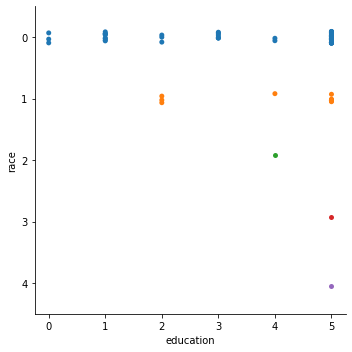

In [77]:
sns.catplot(x="education", y="race", data=t)

In [78]:
t[(t.education == 0) & (t.race == 0)]

,age,education,work,marital,occupation,race,sex,native
50,47,0,9,3,0,0,0,0
63,49,0,10,0,0,0,0,0
97,32,0,9,0,9,0,0,0


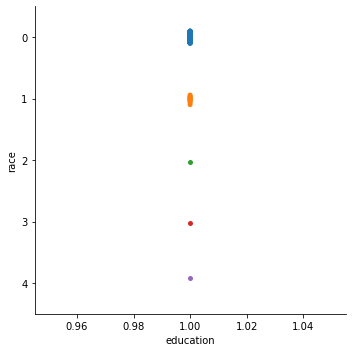

In [79]:
sns.catplot(x="education", y="race", data=df.head(100))

In [80]:
t[(t.education == 1) & (t.race == 0)]

,age,education,work,marital,occupation,race,sex,native
1,50,1,13,0,0,0,0,0
7,52,1,9,0,0,0,0,0
15,25,1,9,6,12,0,0,0
18,43,1,14,3,0,0,1,0
36,48,1,12,0,1,0,0,0
38,53,1,13,0,1,0,0,0
66,29,1,13,0,3,0,0,0
88,48,1,16,0,1,0,0,0
94,47,1,14,6,1,0,1,0


From both the results, it is seen how the k-anonymized dataset provides more records as age and education have been normalized to make the individual records more anonymous. 

#### Query 2
For the second query, we will first visualize how records are distributed in both the non-anonymized and anonymized dataset, between native and age. 
<br>
Following this, we will pass a query that retrieves records that are present with education = 0 and occupation = 0, to see the records retrieved by both the datasets. 

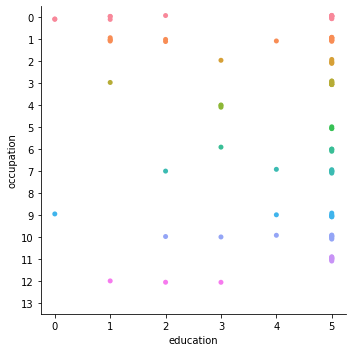

In [83]:
sns.catplot(x="education", y="occupation", data=t)

In [86]:
t[(t.education == 0) & (t.occupation == 9)]

,age,education,work,marital,occupation,race,sex,native
97,32,0,9,0,9,0,0,0


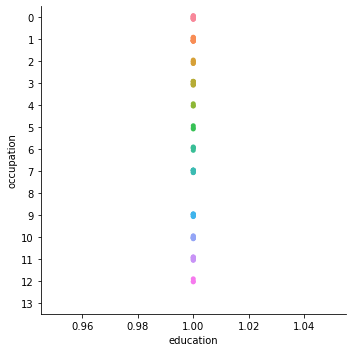

In [84]:
sns.catplot(x="education", y="occupation", data=df.head(100))

In [88]:
dd = df.head(100)
dd[(dd.education == 1) & (dd.occupation == 9)]

,age,education,work,marital,occupation,race,sex,native
25,20,1,9,6,9,0,0,0
27,50,1,9,0,9,0,0,0
45,40,1,11,0,9,0,0,0
60,40,1,9,0,9,0,0,0
77,40,1,9,3,9,0,1,0
84,40,1,10,3,9,0,1,0
96,30,1,9,6,9,0,0,0
97,30,1,9,0,9,0,0,0


From both the results, it is seen how the k-anonymized dataset provides more records as age and education have been normalized to make the individual records more anonymous.
The non-anonymized data retrieves just 1 record while the anonymized data retrieves the whole group based on the condition provided by occupation.